In [ ]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

nltk.download('punkt')

"won't": "will not", "cannot": "can not",
        "i've": "i have", "you've": "you have", "we've": "we have", "they've": "they have",
        "i'm": "i am", "you're": "you are", "we're": "we are", "they're": "they are",
        "i'll": "i will", "you'll": "you will", "he'll": "he will", "she'll": "she will",
        "we'll": "we will", "they'll": "they will", "i'd": "i would", "you'd": "you would",
        "he'd": "he would", "she'd": "she would", "we'd": "we would", "they'd": "they would",
        "should've": "should have", "could've": "could have", "would've": "would have",
        "i'd've": "i would have", "you'd've": "you would have", "he'd've": "he would have",
        "she'd've": "she would have", "we'd've": "we would have", "they'd've": "they would have",

In [127]:
def handle_contractions(tokens):
    contraction_map = {
        "let's": "let us", "he's": "he is", "she's": "she is", "it's": "it is",
        "that's": "that is", "here's": "here is", "there's": "there is",
        "what's": "what is", "when's": "when is", "where's": "where is",
        "who's": "who is", "how's": "how is",  "which's": "which is",
    }

    expanded_tokens = []
    for token in tokens:
        lower_token = token.lower()
        if lower_token in contraction_map:
            expanded_tokens.extend(contraction_map[lower_token].split())
        else:
            # General contractions handling
            token = re.sub(r"won't", "will not", token)
            token = re.sub(r"can't", "can not", token)
            token = re.sub(r"shan't", "shall not", token)
            token = re.sub(r"n't", " not", token)
            token = re.sub(r"'ll", " will", token)
            token = re.sub(r"'re", " are", token)
            token = re.sub(r"'d", " would", token)
            token = re.sub(r"'ve", " have", token)
            token = re.sub(r"'m", " am", token)

            expanded_tokens.append(token)

    return expanded_tokens


# Example usage:
# compute_statistics("sample_2024.txt", "output1.txt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Process tokens by separating leading and trailing punctuation but keeping internal punctuation intact
def process_tokens(tokens):
    processed_tokens = []
    for token in tokens:
        # Leading punctuation
        leading_punct = re.match(r'^[^\w]+', token)
        if leading_punct:
            processed_tokens.append(leading_punct.group())
            token = token[len(leading_punct.group()):]

        # Trailing punctuation
        trailing_punct = re.search(r'[^\w]+$', token)
        if trailing_punct:
            core_word = token[:-len(trailing_punct.group())]
            if core_word:
                processed_tokens.append(core_word)
            processed_tokens.append(trailing_punct.group())
        else:
            processed_tokens.append(token)

    # Filter out any empty tokens (such as '')
    return [token for token in processed_tokens if token.strip()]




In [ ]:
# Merge sentences that end with a colon (:) or multiple punctuations like !!
def merge_sentences(sentences):
    merged_sentences = []
    buffer = sentences[0]

    for i in range(1, len(sentences)):
        current_sentence = sentences[i].strip()
        # Merge if the previous sentence ends with a colon or multiple consecutive punctuation
        if buffer.endswith(':') or re.search(r'[!?]{2,}$', buffer):
            buffer += " " + current_sentence
        else:
            merged_sentences.append(buffer)
            buffer = current_sentence

    merged_sentences.append(buffer)  # Add the final sentence
    return merged_sentences



In [ ]:
# Main function to compute statistics
def compute_statistics(input_file, output_file):
    with open(input_file, 'r') as file:
        paragraphs = file.read().strip().split("\n\n")  # Paragraphs separated by double newlines

    sentence_count = 0
    token_count = 0
    unique_tokens = set()
    token_frequency = Counter()

    for paragraph in paragraphs:
        sentences = sent_tokenize(paragraph.strip())
        sentences = merge_sentences(sentences)
        sentence_count += len(sentences)

        for sentence in sentences:
            #print(f'sentence: {sentence}\n')
            tokens = []
            for word in sentence.split():
                if "'" in word:
                    tokens.append(word)
                else:

                    tokenized_word = nltk.wordpunct_tokenize(word)
                    tokens.extend(tokenized_word)

            #print(f'word_tokenize{tokens}\n')

            # Handle contractions
            tokens = handle_contractions(tokens)
            #print(f'handle_contractions: {tokens}\n')

            # Process punctuation
            tokens = process_tokens(tokens)
            #print(f'process_tokens: {tokens}\n')

            # Remove empty tokens
            tokens = [token for token in tokens if token.strip()]

            token_count += len(tokens)
            unique_tokens.update(tokens)
            token_frequency.update(tokens)

    # Writing statistics to the output file
    with open(output_file, 'w') as out_file:
        out_file.write(f"# of paragraphs = {len(paragraphs)}\n")
        out_file.write(f"# of sentences = {sentence_count}\n")
        out_file.write(f"# of tokens = {token_count}\n")
        out_file.write(f"# of unique tokens = {len(unique_tokens)}\n")
        out_file.write("\n")

        sorted_tokens = sorted(token_frequency.items(), key=lambda x: (-x[1], x[0]))
        for rank, (token, freq) in enumerate(sorted_tokens, start=1):
            out_file.write(f"{rank}: {token}  {freq}\n")

In [128]:
compute_statistics("sample_2024.txt", "output1.txt")

sentence: Here are some random sentences.

word_tokenize['Here', 'are', 'some', 'random', 'sentences', '.']

handle_contractions: ['Here', 'are', 'some', 'random', 'sentences', '.']

process_tokens: ['Here', 'are', 'some', 'random', 'sentences', '.']

sentence: Let's parse them :)  That'll be fun!

word_tokenize["Let's", 'parse', 'them', ':)', "That'll", 'be', 'fun', '!']

handle_contractions: ['let', 'us', 'parse', 'them', ':)', 'That will', 'be', 'fun', '!']

process_tokens: ['let', 'us', 'parse', 'them', ':)', 'That will', 'be', 'fun', '!']

sentence: !

word_tokenize['!']

handle_contractions: ['!']

process_tokens: ['!']

sentence: If you can really see the future, you could've prevented all of this!

word_tokenize['If', 'you', 'can', 'really', 'see', 'the', 'future', ',', 'you', "could've", 'prevented', 'all', 'of', 'this', '!']

handle_contractions: ['If', 'you', 'can', 'really', 'see', 'the', 'future', ',', 'you', 'could have', 'prevented', 'all', 'of', 'this', '!']

process_to

## Question 2

In [131]:
import nltk
import re
from nltk.tokenize import sent_tokenize
from collections import Counter

# Ensure NLTK resources are available
nltk.download('punkt')

# Handle contractions and possessives
def handle_contractions(tokens):
    contraction_map = {
        "let's": "let us", "he's": "he is", "she's": "she is", "it's": "it is",
        "that's": "that is", "here's": "here is", "there's": "there is",
        "what's": "what is", "when's": "when is", "where's": "where is",
        "who's": "who is", "how's": "how is", "won't": "will not", "cannot": "can not",
        "i've": "i have", "you've": "you have", "we've": "we have", "they've": "they have",
        "i'm": "i am", "you're": "you are", "we're": "we are", "they're": "they are",
        "i'll": "i will", "you'll": "you will", "he'll": "he will", "she'll": "she will",
        "we'll": "we will", "they'll": "they will", "i'd": "i would", "you'd": "you would",
        "he'd": "he would", "she'd": "she would", "we'd": "we would", "they'd": "they would",
        "should've": "should have", "could've": "could have", "would've": "would have",
        "i'd've": "i would have", "you'd've": "you would have", "he'd've": "he would have",
        "she'd've": "she would have", "we'd've": "we would have", "they'd've": "they would have", "which's": "which is",
    }

    expanded_tokens = []
    for token in tokens:
        lower_token = token.lower()
        if lower_token in contraction_map:
            expanded_tokens.extend(contraction_map[lower_token].split())
        else:
            token = re.sub(r"won't", "will not", token)
            token = re.sub(r"can't", "can not", token)
            token = re.sub(r"shan't", "shall not", token)
            token = re.sub(r"n't", " not", token)
            token = re.sub(r"'ll", " will", token)
            token = re.sub(r"'re", " are", token)
            token = re.sub(r"'d", " would", token)
            token = re.sub(r"'ve", " have", token)
            token = re.sub(r"'m", " am", token)

            expanded_tokens.append(token)

    return expanded_tokens



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Process tokens by separating leading and trailing punctuation but keeping internal punctuation intact
def process_tokens(tokens):
    processed_tokens = []
    for token in tokens:
        leading_punct = re.match(r'^[^\w]+', token)
        if leading_punct:
            processed_tokens.append(leading_punct.group())
            token = token[len(leading_punct.group()):]

        trailing_punct = re.search(r'[^\w]+$', token)
        if trailing_punct:
            core_word = token[:-len(trailing_punct.group())]
            if core_word:
                processed_tokens.append(core_word)
            processed_tokens.append(trailing_punct.group())
        else:
            processed_tokens.append(token)

    return [token for token in processed_tokens if token.strip()]



In [135]:
# Main function to compute statistics
def compute_statistics(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:  # Open in UTF-8 encoding
        text = file.read()  # Read the full text

    # Split the text into paragraphs using double newlines as paragraph separators
    paragraphs = text.split("\n\n")

    paragraph_count = len(paragraphs)
    sentence_count = 0
    token_count = 0
    unique_tokens = set()
    token_frequency = Counter()

    for paragraph in paragraphs:
        # Tokenize each paragraph into sentences using sent_tokenize
        sentences = sent_tokenize(paragraph.strip())

        sentence_count += len(sentences)

        for sentence in sentences:
            tokens = []
            for word in sentence.split():
                if "'" in word:
                    tokens.append(word)
                else:
                    tokenized_word = nltk.wordpunct_tokenize(word)
                    tokens.extend(tokenized_word)

            tokens = handle_contractions(tokens)
            tokens = process_tokens(tokens)
            tokens = [token for token in tokens if token.strip()]

            token_count += len(tokens)
            unique_tokens.update(tokens)
            token_frequency.update(tokens)

    with open(output_file, 'w', encoding='utf-8') as out_file:  # Write to output2.txt
        out_file.write(f"# of paragraphs = {paragraph_count}\n")
        out_file.write(f"# of sentences = {sentence_count}\n")
        out_file.write(f"# of tokens = {token_count}\n")
        out_file.write(f"# of unique tokens = {len(unique_tokens)}\n")
        out_file.write("\n")

        sorted_tokens = sorted(token_frequency.items(), key=lambda x: (-x[1], x[0]))
        for rank, (token, freq) in enumerate(sorted_tokens, start=1):
            out_file.write(f"{rank}: {token}  {freq}\n")

    return token_frequency

In [136]:
token_frequency  = compute_statistics("war-and-peace.txt", "output2.txt")

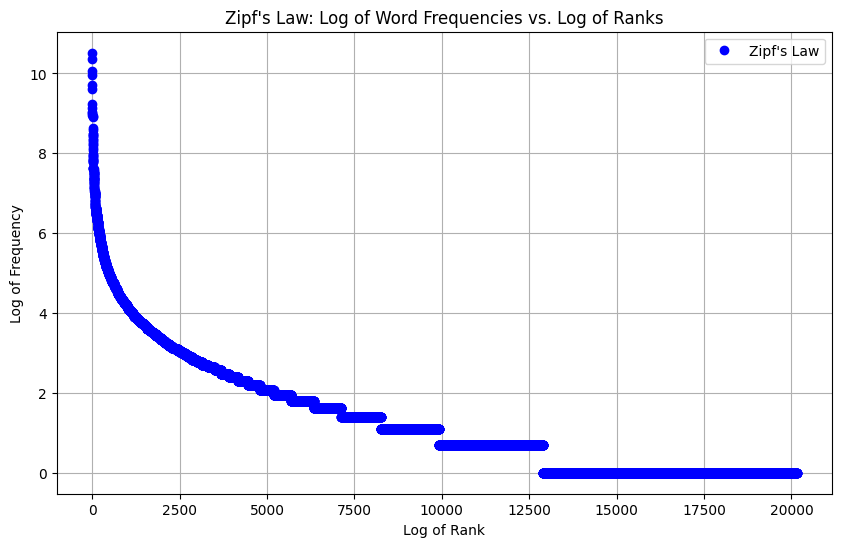

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math

def plot_zipfs_law(token_frequency):
    # Sort words by their frequency in descending order
    sorted_tokens = sorted(token_frequency.items(), key=lambda x: x[1], reverse=True)

    # Extract the frequencies
    ranks = np.arange(1, len(sorted_tokens) + 1)
    frequencies = np.array([freq for _, freq in sorted_tokens])

    # Apply logarithmic transformation (log base e)
    log_ranks = np.log(ranks)
    log_frequencies = np.log(frequencies)

    # Plot the log(frequencies) vs log(ranks)
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, log_frequencies, label="Zipf's Law", color="b", marker="o", linestyle="None")

    plt.title("Zipf's Law: Log of Word Frequencies vs. Log of Ranks")
    plt.xlabel("Log of Rank")
    plt.ylabel("Log of Frequency")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example of how to call the function with token_frequency (assuming it's available)
# For demonstration purposes, let's assume token_frequency is already calculated
plot_zipfs_law(token_frequency)
